# HW 2



In [1]:
# Загрузка библиотек

import numpy as np

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Загрузка датасета

train_dataset = torchvision.datasets.CIFAR100(root = './data',
                                              train = True,
                                              download = True,
                                              transform = transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR100(root='./data',
                                             train = False,
                                             download = True,
                                             transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 64, 
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 4,
                                          shuffle = False)

image, label = train_dataset[0]

# Проверка
print (image.size())
print (label)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([3, 32, 32])
19


In [3]:
# Размер

3 * 32 * 32

3072

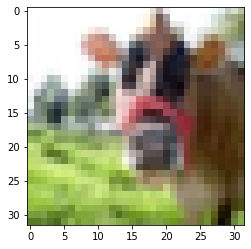

In [4]:
# Проверка через plt

plt.imshow(image.permute(1, 2, 0).numpy())

In [5]:
# Создание class Net

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = torch.max(0.1 * x, 0.5 * x)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        return x

net = Net(3072, 256, 100)

In [6]:
# Проверка

net

Net(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=100, bias=True)
)

In [7]:
# Обучение

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # Градиент 0
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Информация
        running_loss += loss.item()
        if i % 300 == 0:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Сomplete')

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|█         | 1/10 [01:05<09:46, 65.17s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.691
[2,   601] loss: 0.691


 20%|██        | 2/10 [02:07<08:28, 63.61s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.691
[3,   601] loss: 0.690


 30%|███       | 3/10 [03:10<07:21, 63.10s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.690
[4,   601] loss: 0.690


 40%|████      | 4/10 [04:12<06:16, 62.74s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.690
[5,   601] loss: 0.690


 50%|█████     | 5/10 [05:14<05:12, 62.49s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.690
[6,   601] loss: 0.689


 60%|██████    | 6/10 [06:16<04:10, 62.50s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.689
[7,   601] loss: 0.688


 70%|███████   | 7/10 [07:19<03:07, 62.38s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.686
[8,   601] loss: 0.684


 80%|████████  | 8/10 [08:21<02:04, 62.32s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.677
[9,   601] loss: 0.667


 90%|█████████ | 9/10 [09:23<01:02, 62.17s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.645
[10,   601] loss: 0.638


100%|██████████| 10/10 [10:24<00:00, 62.50s/it]

Сomplete
